<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/4_ArchitecturalBasics/Experiments/MNIST_Exp3_WithBatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment - 3

**Objective** : In previous [experiment](https://github.com/gkdivya/EVA/blob/main/4_ArchitecturalBasics/Experiments/MNIST_Exp2_WithTransitionBlock.ipynb) with **5690** parameters, we were able to achieve 98% accuracy. In this notebook, we will be using **Batch Normalization** and observe if it helps with the accuracy.

**Batch Normalization**:
Even though we normalize the input values with Image normalization transform, parameter values changes while training the network.

Batch Normalization is a technique to normalize the values getting passed within the network. 

Its normally applied to activations of a prior convolutional layer or on the inputs directly.

[torch.nn.BatchNorm2d](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) 

It helps with faster and smoother training process.


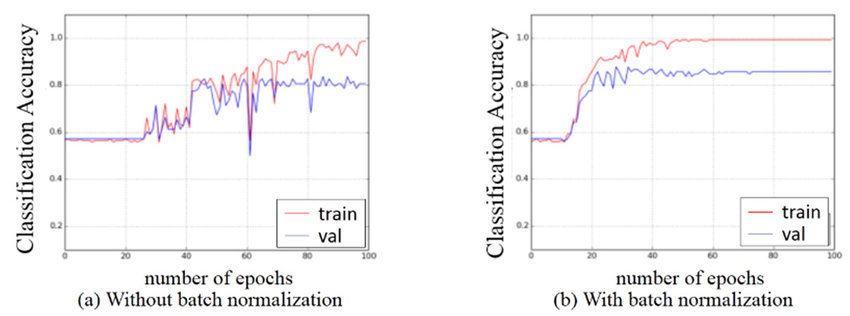


In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 10, 3, padding=1, bias=False),  #Input:28x28 Output:26x26 GRF:3x3            
            nn.BatchNorm2d(10),
            nn.ReLU(),

            nn.Conv2d(10, 10, 3, padding=1, bias=False), #Input:26x26 Output:24x24 GRF:5x5
            nn.BatchNorm2d(10),
            nn.ReLU()    
        )

        self.trans1 = nn.Sequential(
            nn.MaxPool2d(2, 2),  #Input:22x22 Output:11x11 GRF:14x14
            nn.Conv2d(10, 10, 1, bias=False), #Input:22x22 Output:11x11 GRF:14x14
            nn.ReLU()
        )

        self.conv2 =  nn.Sequential(
            nn.Conv2d(10, 10, 3, padding=1, bias=False), #Input:11x11 Output:9x9 GRF:16x16
            nn.BatchNorm2d(10),
            nn.ReLU(),

            nn.Conv2d(10, 10, 3, padding=1, bias=False),  #Input:9x9 Output:7x7 GRF:18x18
            nn.BatchNorm2d(10),
            nn.ReLU()            
        )

        self.trans2 = nn.Sequential(
            nn.MaxPool2d(2, 2),  #Input:22x22 Output:11x11 GRF:14x14
            nn.Conv2d(10, 10, 1, bias=False), #Input:9x9 Output:7x7 GRF:18x18
            nn.ReLU()
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(10, 10, 3, bias=False), #Input:7x7 Output:5x5 GRF:20x20
            nn.BatchNorm2d(10),
            nn.ReLU(),

            nn.Conv2d(10, 10, 3, bias=False), #Input:5x5 Output:3x3 GRF:22x22
            nn.BatchNorm2d(10),
            nn.ReLU(),

            nn.Conv2d(10, 10, 3, bias=False) #Input:5x5 Output:3x3 GRF:22x22
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.trans1(x)
        x = self.conv2(x)
        x = self.trans2(x)
        x = self.conv3(x)

        x = x.view(-1,10)
        return F.log_softmax(x,dim=1)

In [3]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
            Conv2d-4           [-1, 10, 28, 28]             900
       BatchNorm2d-5           [-1, 10, 28, 28]              20
              ReLU-6           [-1, 10, 28, 28]               0
         MaxPool2d-7           [-1, 10, 14, 14]               0
            Conv2d-8           [-1, 10, 14, 14]             100
              ReLU-9           [-1, 10, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             900
      BatchNorm2d-11           [-1, 10, 14, 14]              20
             ReLU-12           [-1, 10, 14, 14]               0
           Conv2d-13           [-1, 10, 14, 14]             900
      BatchNorm2d-14           [-1, 10,

In [4]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomRotation(5),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'epoch={epoch} loss={loss.item():.10f} batch_id={batch_idx:05d}')
    #print( f'Epoch {epoch} - \nTrain set : loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [6]:

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.7)

for epoch in range(1, 20):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0759, Accuracy: 9766/10000 (97.66%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0554, Accuracy: 9833/10000 (98.33%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0506, Accuracy: 9839/10000 (98.39%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0384, Accuracy: 9870/10000 (98.70%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0361, Accuracy: 9886/10000 (98.86%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0454, Accuracy: 9859/10000 (98.59%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0372, Accuracy: 9885/10000 (98.85%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0302, Accuracy: 9901/10000 (99.01%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0379, Accuracy: 9880/10000 (98.80%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0418, Accuracy: 9858/10000 (98.58%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0409, Accuracy: 9868/10000 (98.68%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0343, Accuracy: 9890/10000 (98.90%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0307, Accuracy: 9914/10000 (99.14%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0317, Accuracy: 9901/10000 (99.01%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0306, Accuracy: 9904/10000 (99.04%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0313, Accuracy: 9902/10000 (99.02%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0310, Accuracy: 9907/10000 (99.07%)



  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0290, Accuracy: 9909/10000 (99.09%)



epoch=19 loss=0.0080008851 batch_id=00468: 100%|██████████| 469/469 [00:26<00:00, 17.95it/s]


Test set: Average loss: 0.0281, Accuracy: 9911/10000 (99.11%)



## Summary
By adding Batch normalization, parameters got increased. It adds **two parameters to each layer**, so the normalized output is multiplied by a *mean* and *standard deviation* parameter. With batch normalization, the number of parameters is **5810**.

With Batch noralization, validation accuracy increased to **99.11%**

And the difference between train and validation accuracy is **~0.2**